In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [13]:
def vis_prediction(dataframe, no_features, first_feature, last_feature, line, location_line):
    fig, axes = plt.subplots(no_features, 1, figsize=(20,20))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature,last_feature):
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+3*no_features].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["blue"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["blue","red"]

        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i], 
                     ax=ax[i-first_feature], 
                     linewidth=0.2,
                     color="black")
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i+no_features],
                        ax=ax[i-first_feature], 
                        hue=columns[i+3*no_features], 
                        palette=palette)
        if line:
            ax[i-first_feature].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=1, label="train-validation")
            
    plt.show()

In [15]:
def vis_reconstruction_error(dataframe, no_features, first_feature, last_feature):
    fig, axes = plt.subplots(no_features, 1, figsize=(20,20))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+20],
                     ax=ax[i-first_feature],
                     color="blue",)
        if i == 1:
            ax[i-first_feature].axhline(0.5, color="r", linestyle ="-", linewidth=1)
        elif i == 2:
            ax[i-first_feature].axhline(0.2, color="r", linestyle ="-", linewidth=1)
        elif i == 3:
            ax[i-first_feature].axhline(0.6, color="r", linestyle ="-", linewidth=1)
        elif i == 4:
            ax[i-first_feature].axhline(0.4, color="r", linestyle ="-", linewidth=1)
        elif i == 5:
            ax[i-first_feature].axhline(0.5, color="r", linestyle ="-", linewidth=1)
        elif i == 6:
            ax[i-first_feature].axhline(0.6, color="r", linestyle ="-", linewidth=1)
        elif i == 7:
            ax[i-first_feature].axhline(0.5, color="r", linestyle ="-", linewidth=1)
        elif i == 8:
            ax[i-first_feature].axhline(0.75, color="r", linestyle ="-", linewidth=1)
        elif i == 9:
            ax[i-first_feature].axhline(0.2, color="r", linestyle ="-", linewidth=1)
        else:
            ax[i-first_feature].axhline(0.15, color="r", linestyle ="-", linewidth=1)

## Predicted Data

In [16]:
artifical_data = pd.read_csv("../../files/prediction/MSE/cpps_small_degradation.csv", sep=";")
training_set = artifical_data.iloc[:10000,:]

## Reconstruction Error during Training

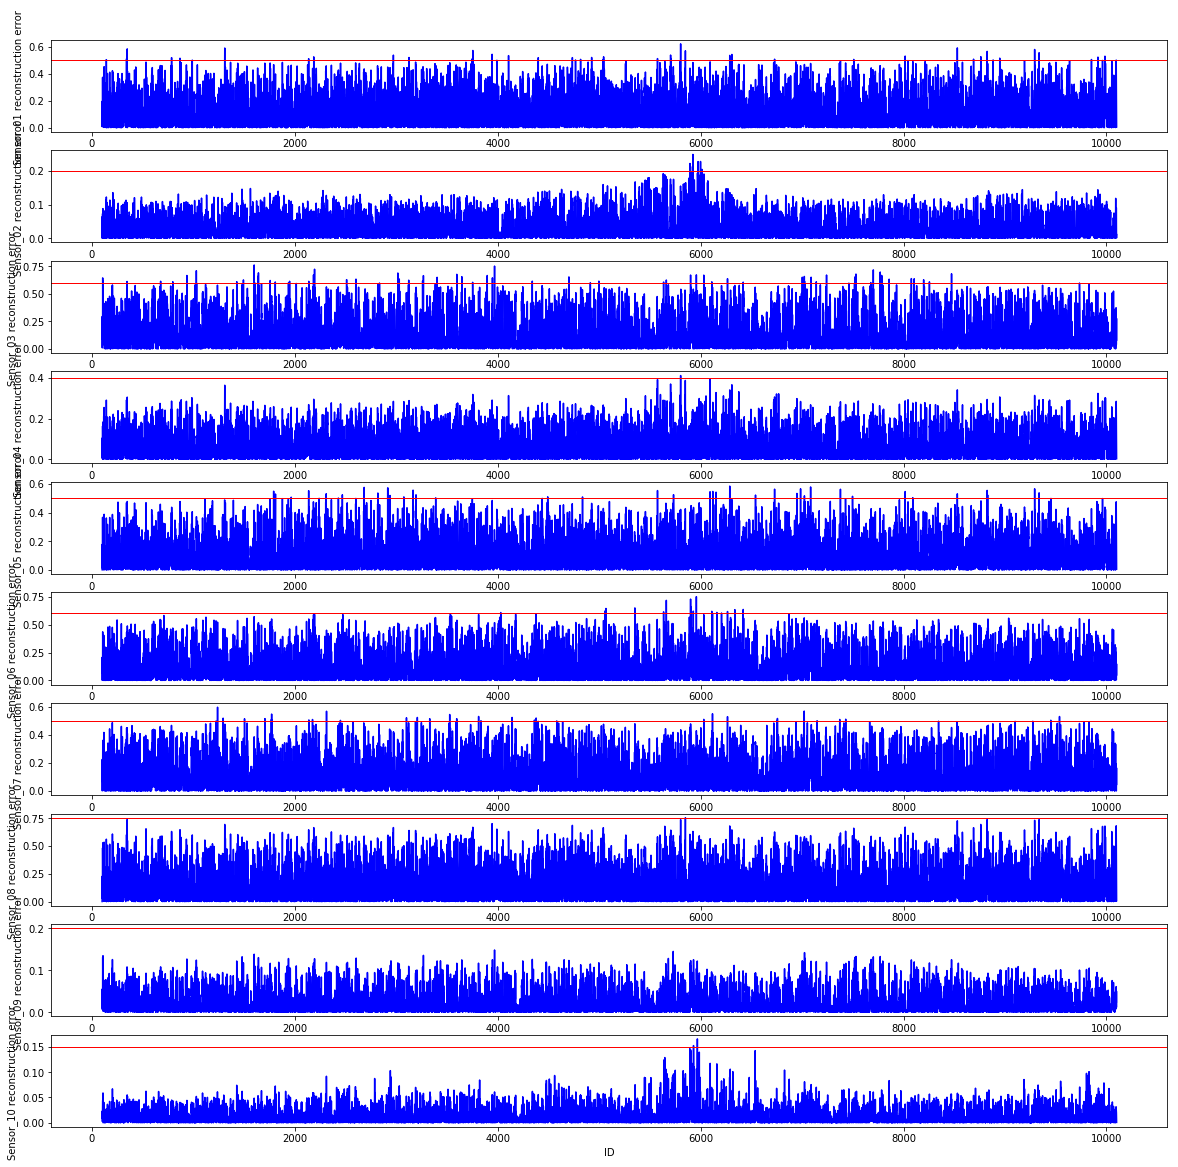

In [22]:
vis_reconstruction_error(training_set, 10, 1, 11)
plt.show()

## Change of Degeneration Level

In [5]:
start_phase_1 = 24030
start_phase_2 = 37076

# Visualisation of Prediction - Cpps Data with small degeneration
## Phase 0 - no error

In [6]:
artifical_data = pd.read_csv("../../files/prediction/MSE/cpps_small_degradation.csv", sep=";")
artifical_data = artifical_data.iloc[10000:16000,:]

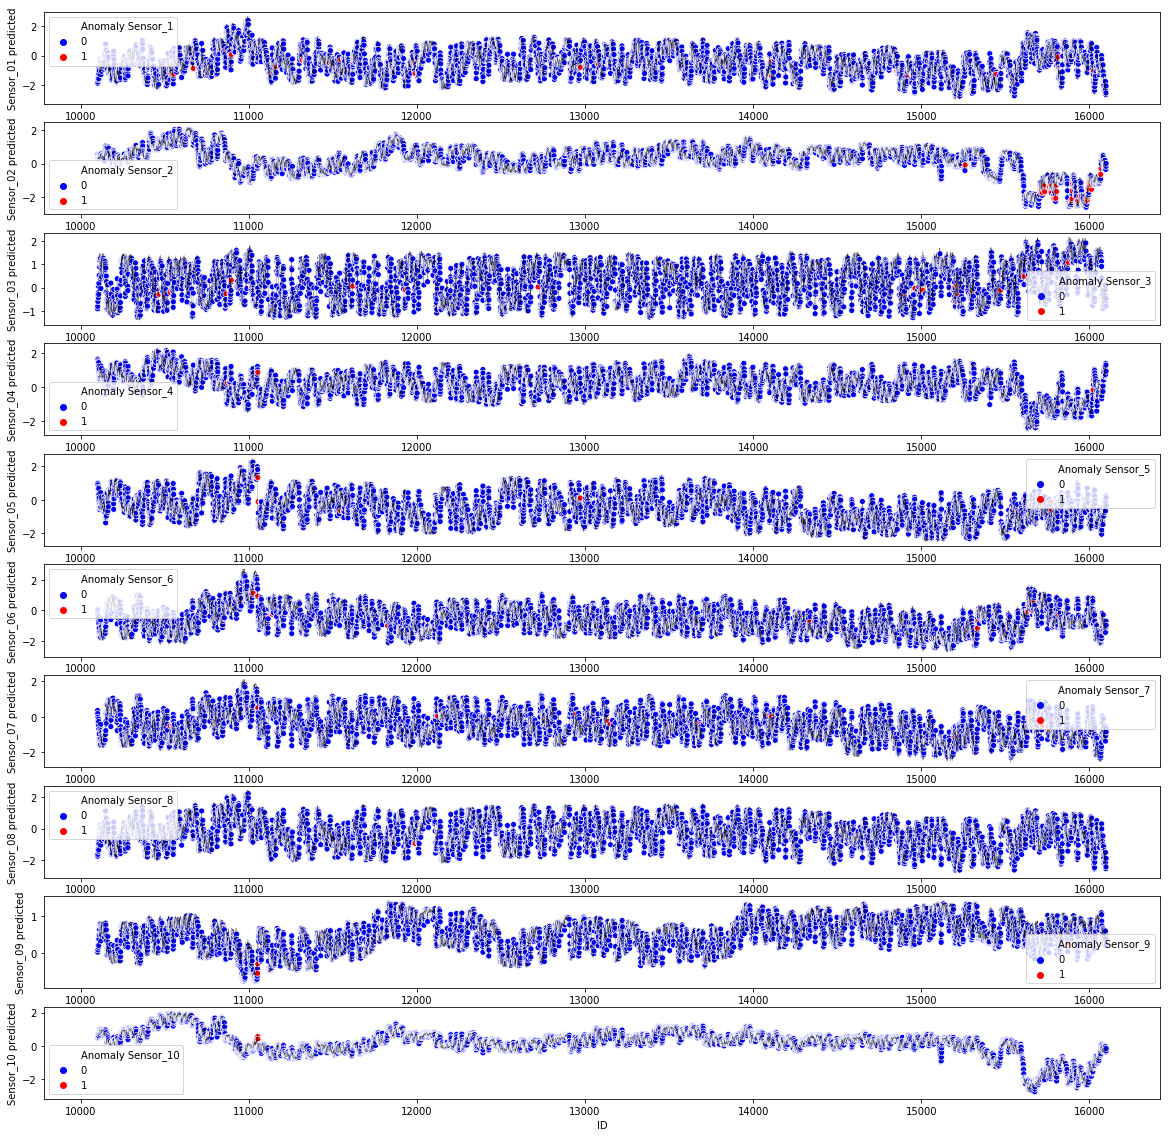

In [7]:
vis_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = False,
                         location_line = start_phase_1
                        )
plt.show()

## Transistion from Phase 0 to Phase 1

In [8]:
artifical_data = pd.read_csv("../../files/prediction/MsE/cpps_small_degradation.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_1-200:26000,:]

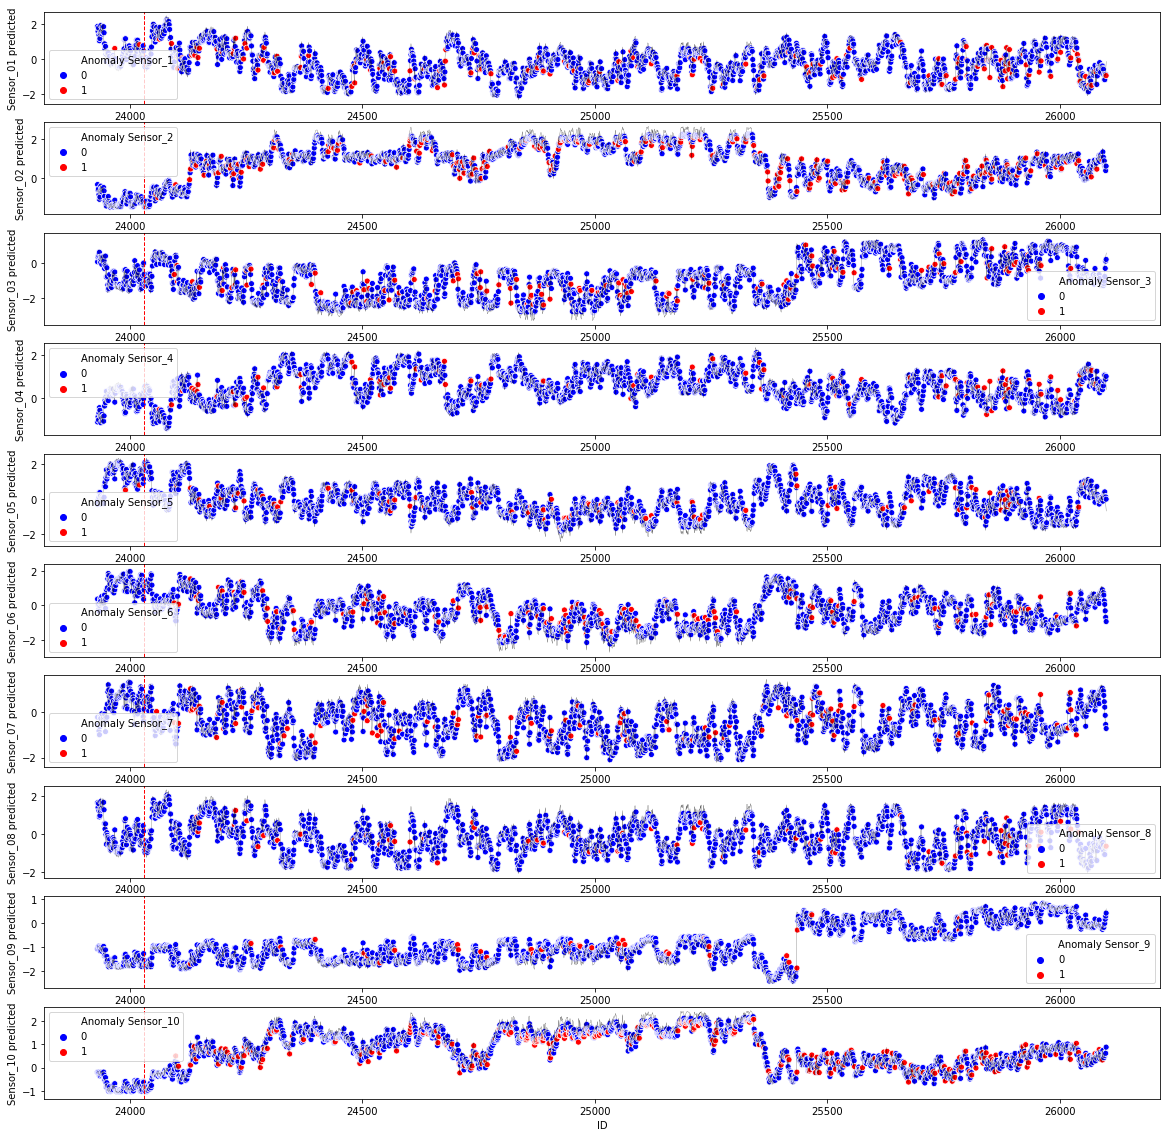

In [9]:
vis_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = True,
                         location_line = start_phase_1
                        )
plt.show()

## Transistion from Phase 1 to Phase 2

In [10]:
artifical_data = pd.read_csv("../../files/prediction/MSE/cpps_small_degradation.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_2-200:38000,:]

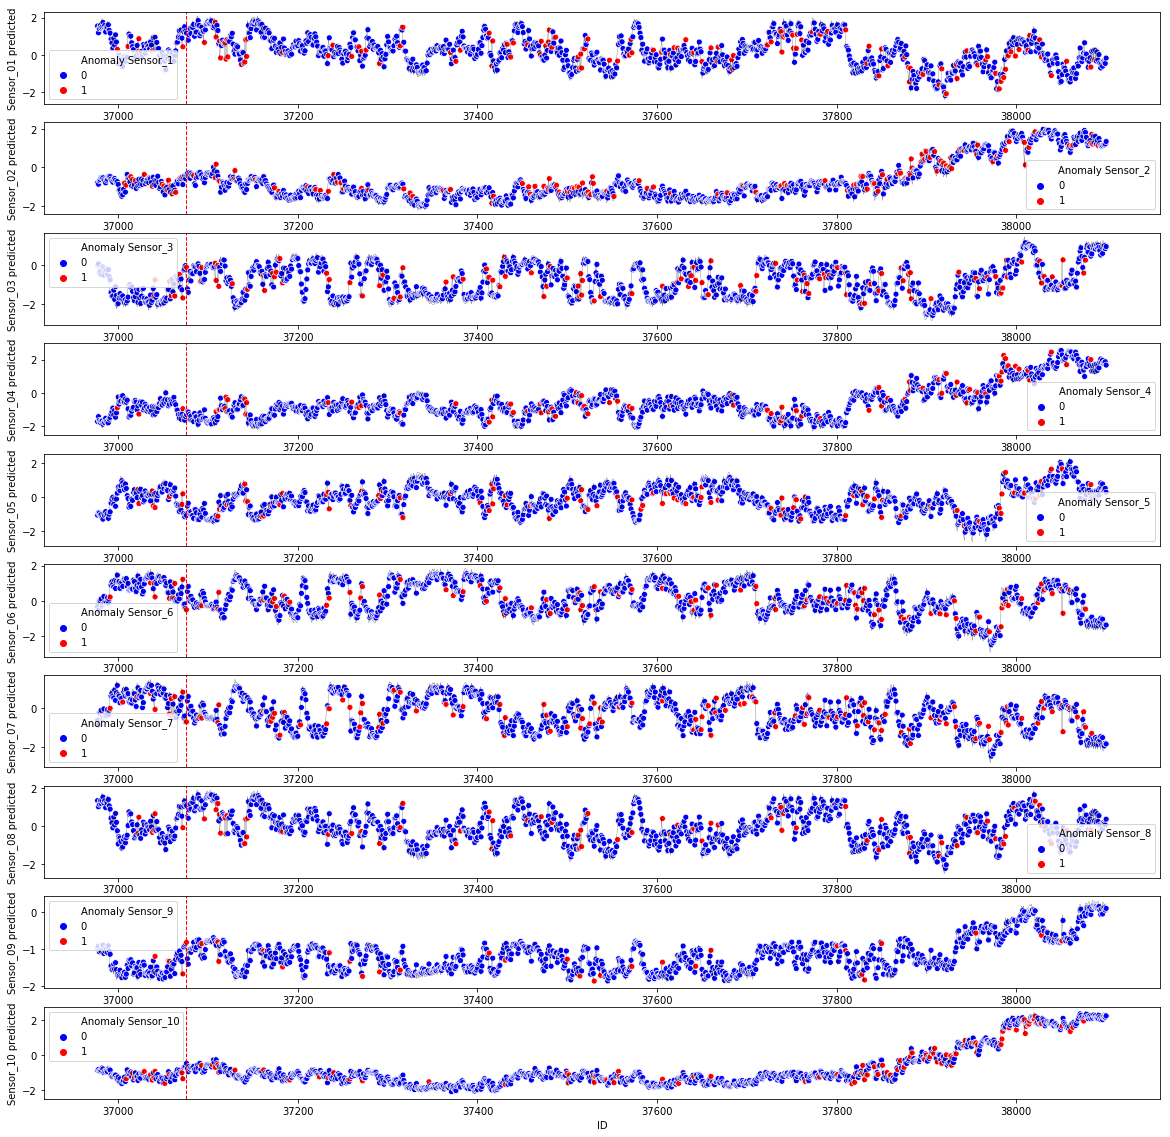

In [11]:
vis_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = True,
                         location_line = start_phase_2
                        )
plt.show()

## Evaluation Metrics

In [57]:
all_data = pd.read_csv("../../files/prediction/MSE/cpps_small_degradation.csv", sep=";")

In [88]:
def vis_anomaly_detection(dataframe, no_features, first_feature, last_feature, location_line1, location_line2):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+3*no_features].cumsum(),
                     ax=ax[i-first_feature],
                     color="blue",)
        ax[i-first_feature].set_ylim(0, 5000) 
        ax[i-first_feature].axvline(location_line1, color="r", linestyle ="--", linewidth=1)
        ax[i-first_feature].axvline(location_line2, color="r", linestyle ="--", linewidth=1)
        ax[i-first_feature].text(10000, 4000, "Phase 0: No Error", fontsize=15)
        ax[i-first_feature].text(27000, 4000, "Phase 1: Small Error", fontsize=15)
        ax[i-first_feature].text(40000, 4000, "Phase 2: Large Error", fontsize=15)

### Cumulative Sum of Anomaly, labeld by LSTM-Model

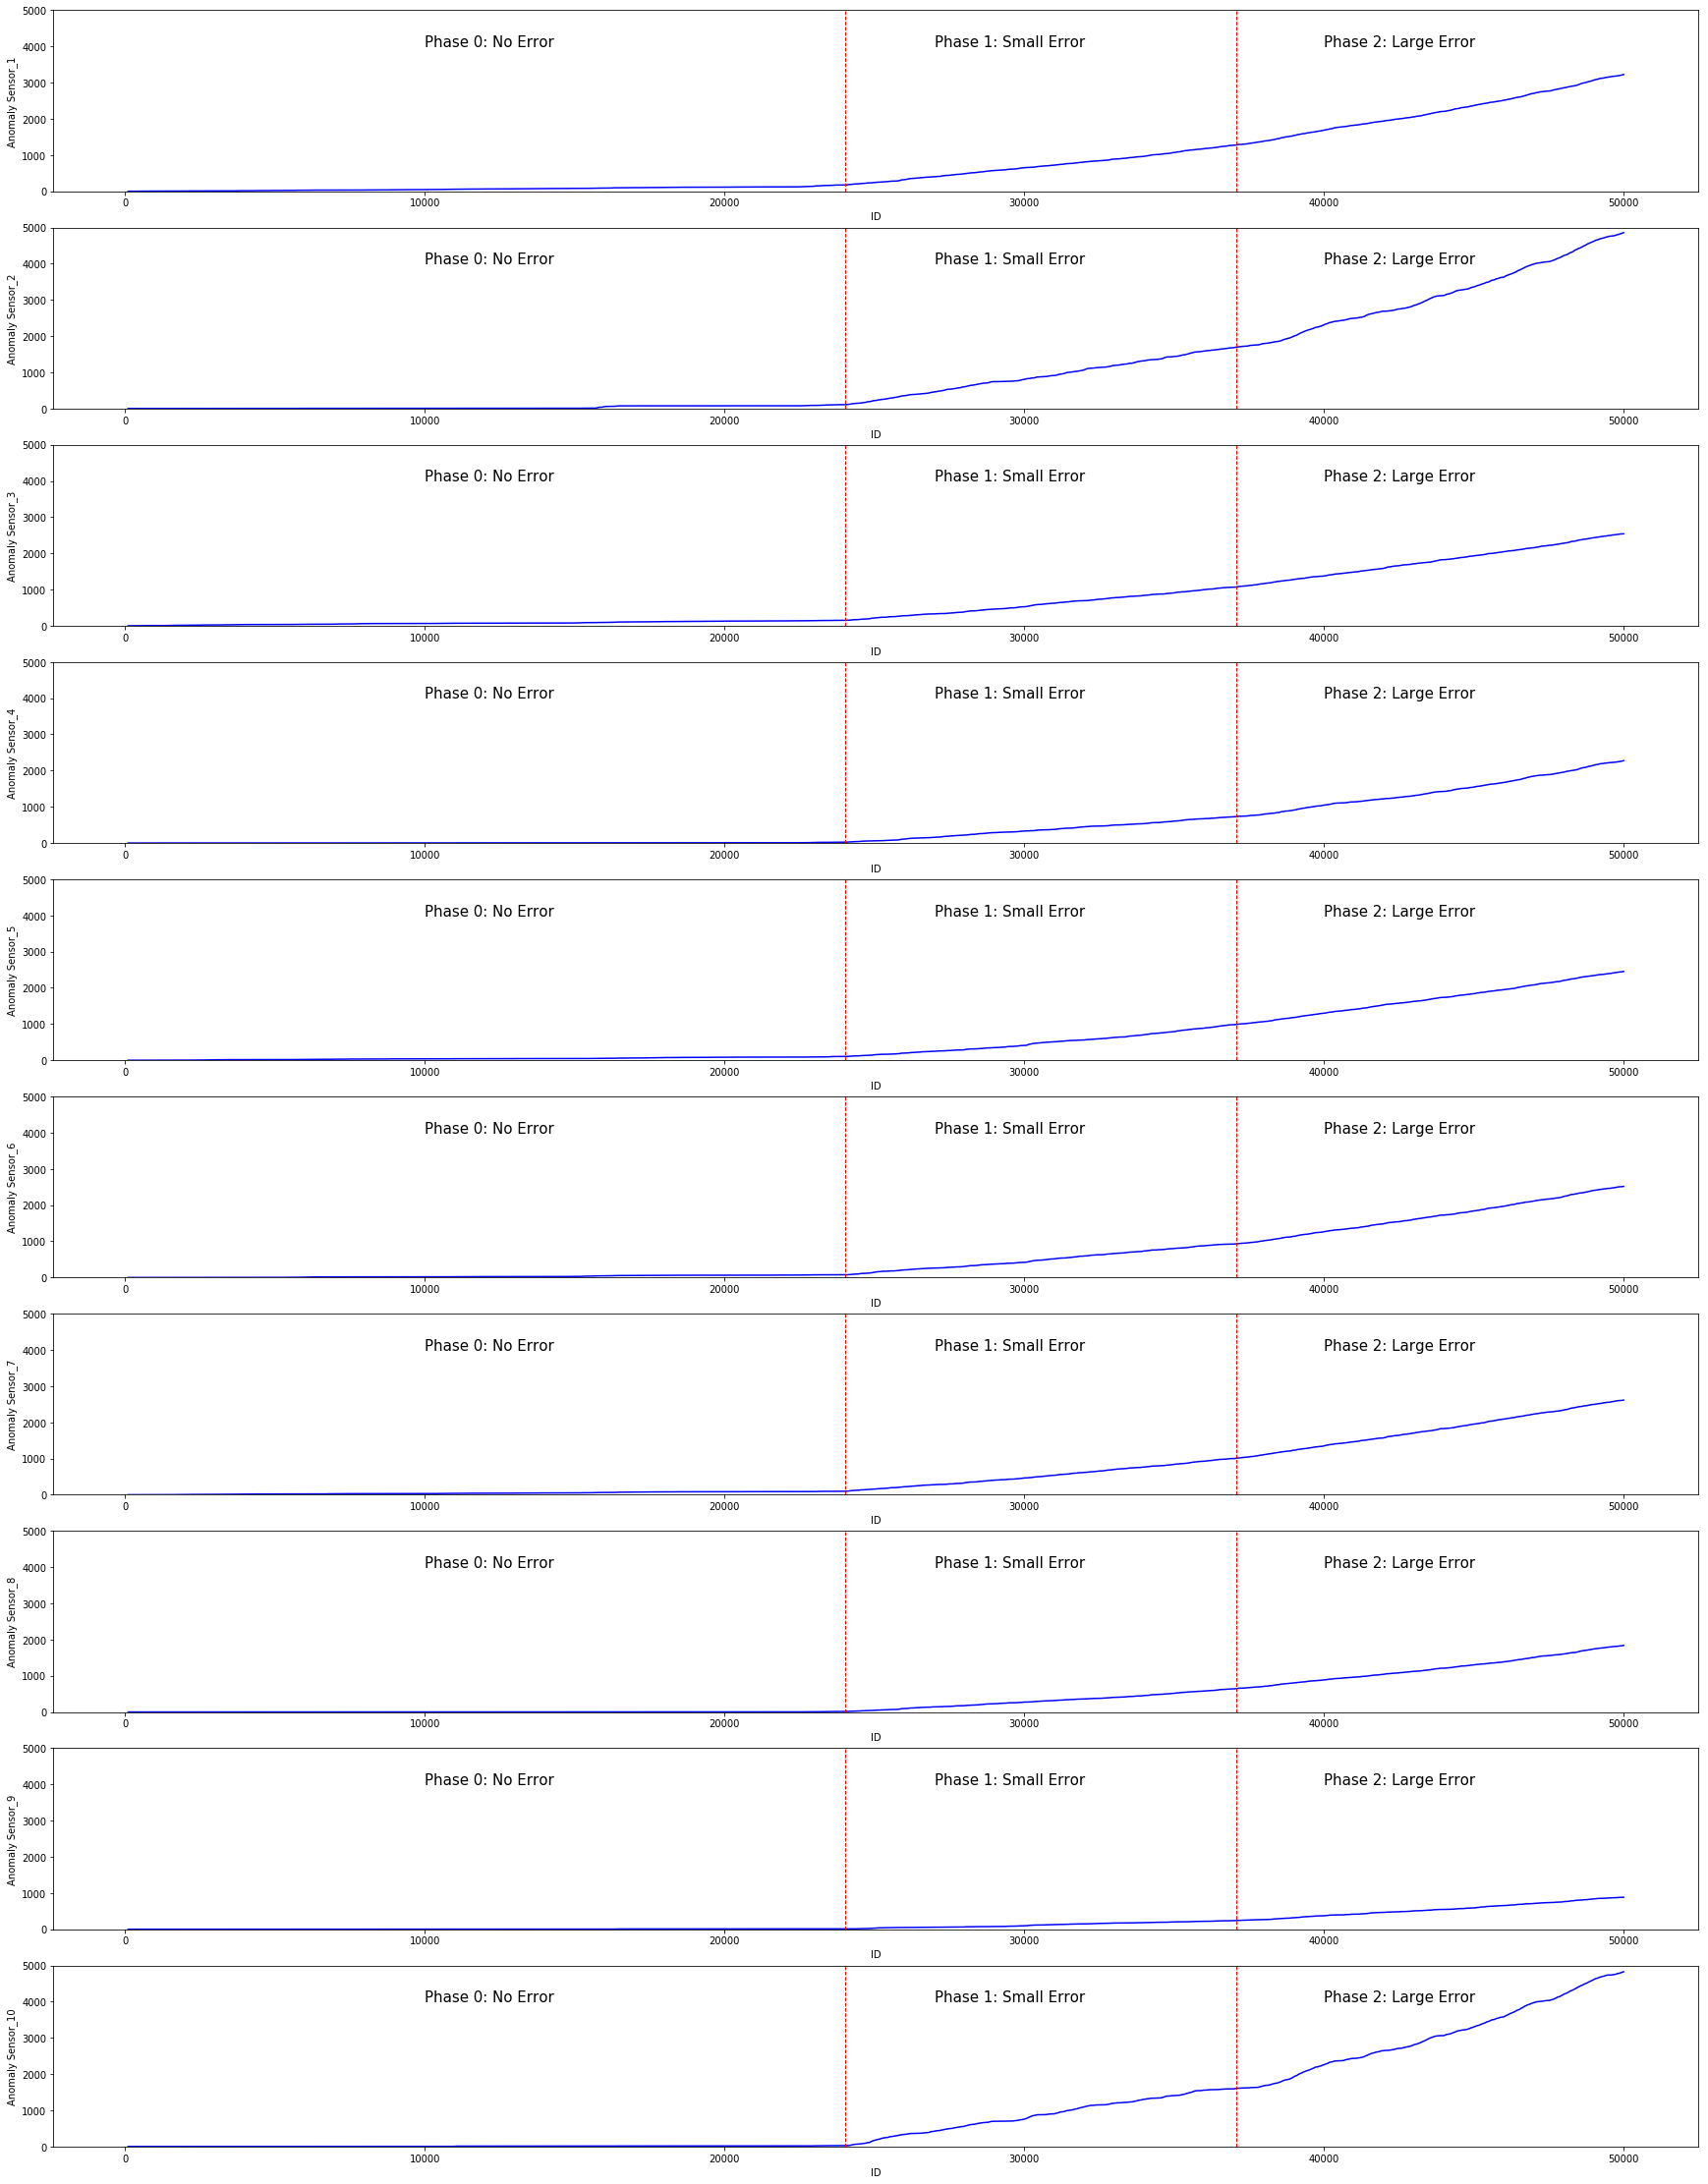

In [89]:
vis_anomaly_detection(all_data, 10, 1, 11, start_phase_1, start_phase_2)
plt.show()